In [20]:
import sys
import os
import csv
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [21]:
sys.path.append(os.path.join(sys.path[0], '../../../'))

In [22]:
files = [pd.read_csv('design_comparison_1.csv'), pd.read_csv('design_comparison_2.csv')]
df = pd.concat(files,ignore_index=True)

In [23]:
df

,Entries per page(E),Physical Entries per page(B),Selectivity(s),Max bits per element(H),Total elements (N),Empty Reads,Non-Empty Reads,Range Queries,Writes,BO Design,Analytical Design,BO Cost,Analytical Cost,Diff(Analytical-Bayesian)
0,8192,16.0,3.101181e-09,5.971071,361670612,0.328,0.127,0.183,0.362,"LSMDesign(h=2.667716675677109, T=8.0, policy=<...","LSMDesign(h=3.0023291538887427, T=8.2692225457...",1.654076,1.650681,-0.003395
1,2048,64.0,4.375817e-08,8.834162,233438177,0.288,0.617,0.022,0.073,"LSMDesign(h=7.188063386900873, T=16.0, policy=...","LSMDesign(h=6.908008315273583, T=14.3590380161...",0.737131,0.736479,-0.000652
2,1024,64.0,1.578232e-08,15.183822,371473242,0.724,0.116,0.067,0.093,"LSMDesign(h=7.0208520822663765, T=25.0, policy...","LSMDesign(h=9.122361650949996, T=22.7374994481...",0.307190,0.297559,-0.009631
3,1024,128.0,4.006619e-08,18.649666,618309997,0.254,0.419,0.301,0.026,"LSMDesign(h=9.100760402407493, T=32.0, policy=...","LSMDesign(h=6.305051127539037, T=31.0, policy=...",0.896752,0.888628,-0.008124
4,1024,64.0,4.197560e-08,6.229658,876405779,0.187,0.307,0.455,0.051,"LSMDesign(h=2.755166082010438, T=31.0, policy=...","LSMDesign(h=2.3268195382363333, T=30.999999999...",1.423774,1.421409,-0.002365
5,2048,64.0,2.690755e-08,11.492196,985130846,0.298,0.014,0.080,0.608,"LSMDesign(h=7.686885772440743, T=9.0, policy=<...","LSMDesign(h=5.837562636760175, T=8.23091799545...",0.531936,0.517104,-0.014832
6,1024,64.0,8.181968e-08,11.096073,810591713,0.703,0.115,0.162,0.020,"LSMDesign(h=7.660157495080137, T=31.0, policy=...","LSMDesign(h=7.156997604714947, T=31.0, policy=...",0.588504,0.587334,-0.001170
7,8192,8.0,7.793652e-08,7.352159,126275060,0.172,0.194,0.619,0.015,"LSMDesign(h=3.1054661799798233, T=32.0, policy...","LSMDesign(h=2.043814481339874, T=31.0, policy=...",2.483838,2.480531,-0.003307
8,4096,32.0,7.840913e-08,6.699340,838139016,0.007,0.371,0.539,0.083,"LSMDesign(h=1.3249983487381576, T=31.0, policy...","LSMDesign(h=0.0, T=31.0, policy=<Policy.Leveli...",2.686328,2.656574,-0.029754
9,4096,8.0,8.861546e-09,19.049582,117027274,0.402,0.042,0.536,0.020,"LSMDesign(h=8.730164831599005, T=32.0, policy=...","LSMDesign(h=5.850761350758528, T=31.0, policy=...",1.182491,1.165189,-0.017302


In [ ]:
cf.calc_cost(LSMDesign(h=15.83, T=31.0, policy=Policy.Leveling, Q=1.0, Y=1.0, Z=1.0, K=[]), System(E=1024, s=2.9102648491798314e-8, B=32.0, N=526728795, H=15.847837338766473, phi=1.0), 0.09, 0.205, 0.605, 0.09999999999999998)

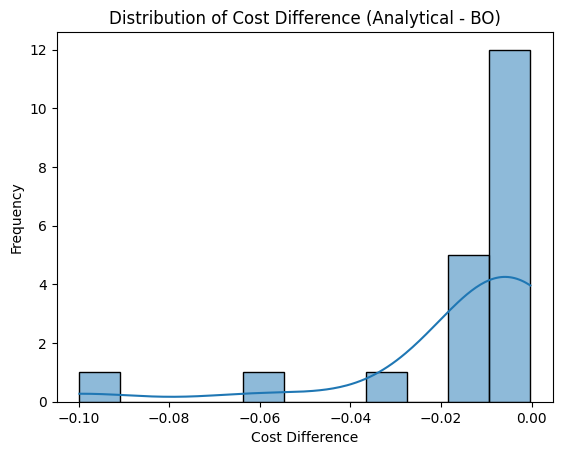

In [9]:
df['Cost_Difference'] = df['Analytical Cost'] - df['BO Cost']

sns.histplot(df['Cost_Difference'], kde=True)
plt.title('Distribution of Cost Difference (Analytical - BO)')
plt.xlabel('Cost Difference')
plt.ylabel('Frequency')
plt.show()


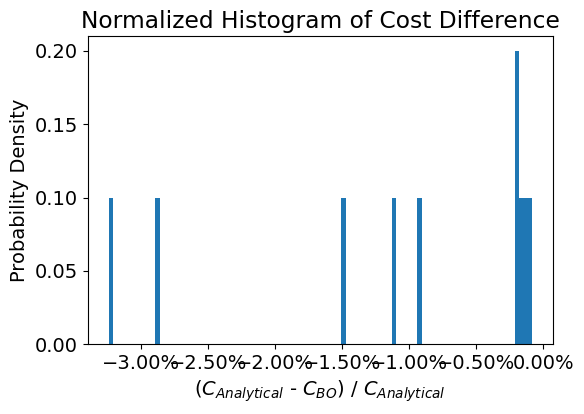

In [11]:

df = pd.read_csv('design_comparison_1.csv')

df['norm_delta'] = (df['Analytical Cost'] - df['BO Cost']) / df['Analytical Cost']

data = df['norm_delta'].values
weights = np.ones_like(data) / len(data)

# plt.figure(figsize=(10, 6))
# plt.hist(data, bins=50, weights=weights, color='blue', alpha=0.7, edgecolor='black')
# plt.xlabel('Normalized Difference (Analytical Cost - BO Cost) / Analytical Cost')
# plt.ylabel('Probability Density')
# plt.title('Normalized Histogram of Cost Difference')
# plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
# plt.grid(True)
# plt.show()


plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(6, 4))
data = df['norm_delta'].values
ax.hist(data, bins=100, weights=np.ones_like(data)/len(data))
ax.set_xlabel('($C_{Analytical}$ - $C_{BO}$) / $C_{Analytical}$')
ax.set_ylabel('Probability Density')
ax.set_title('Normalized Histogram of Cost Difference')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
# save_fig(fig, 'learned_cost_model_l1_error.pdf')

In [15]:
df[df['Diff(Analytical-Bayesian)'] > -0.1].shape[0] / df.shape[0]

1.0

In [13]:
df.columns

Index(['Entries per page(E)', 'Physical Entries per page(B)', 'Selectivity(s)',
       'Max bits per element(H)', 'Total elements (N)', 'Empty Reads',
       'Non-Empty Reads', 'Range Queries', 'Writes', 'BO Design',
       'Analytical Design', 'BO Cost', 'Analytical Cost',
       'Diff(Analytical-Bayesian)', 'norm_delta'],
      dtype='object')

In [16]:
df.sort_values(by='norm_delta')

,Entries per page(E),Physical Entries per page(B),Selectivity(s),Max bits per element(H),Total elements (N),Empty Reads,Non-Empty Reads,Range Queries,Writes,BO Design,Analytical Design,BO Cost,Analytical Cost,Diff(Analytical-Bayesian),norm_delta
2,1024,64.0,1.578232e-08,15.183822,371473242,0.724,0.116,0.067,0.093,"LSMDesign(h=7.0208520822663765, T=25.0, policy...","LSMDesign(h=9.122361650949996, T=22.7374994481...",0.307190,0.297559,-0.009631,-0.032366
5,2048,64.0,2.690755e-08,11.492196,985130846,0.298,0.014,0.080,0.608,"LSMDesign(h=7.686885772440743, T=9.0, policy=<...","LSMDesign(h=5.837562636760175, T=8.23091799545...",0.531936,0.517104,-0.014832,-0.028683
9,4096,8.0,8.861546e-09,19.049582,117027274,0.402,0.042,0.536,0.020,"LSMDesign(h=8.730164831599005, T=32.0, policy=...","LSMDesign(h=5.850761350758528, T=31.0, policy=...",1.182491,1.165189,-0.017302,-0.014849
8,4096,32.0,7.840913e-08,6.699340,838139016,0.007,0.371,0.539,0.083,"LSMDesign(h=1.3249983487381576, T=31.0, policy...","LSMDesign(h=0.0, T=31.0, policy=<Policy.Leveli...",2.686328,2.656574,-0.029754,-0.011200
3,1024,128.0,4.006619e-08,18.649666,618309997,0.254,0.419,0.301,0.026,"LSMDesign(h=9.100760402407493, T=32.0, policy=...","LSMDesign(h=6.305051127539037, T=31.0, policy=...",0.896752,0.888628,-0.008124,-0.009142
0,8192,16.0,3.101181e-09,5.971071,361670612,0.328,0.127,0.183,0.362,"LSMDesign(h=2.667716675677109, T=8.0, policy=<...","LSMDesign(h=3.0023291538887427, T=8.2692225457...",1.654076,1.650681,-0.003395,-0.002057
6,1024,64.0,8.181968e-08,11.096073,810591713,0.703,0.115,0.162,0.020,"LSMDesign(h=7.660157495080137, T=31.0, policy=...","LSMDesign(h=7.156997604714947, T=31.0, policy=...",0.588504,0.587334,-0.001170,-0.001992
4,1024,64.0,4.197560e-08,6.229658,876405779,0.187,0.307,0.455,0.051,"LSMDesign(h=2.755166082010438, T=31.0, policy=...","LSMDesign(h=2.3268195382363333, T=30.999999999...",1.423774,1.421409,-0.002365,-0.001664
7,8192,8.0,7.793652e-08,7.352159,126275060,0.172,0.194,0.619,0.015,"LSMDesign(h=3.1054661799798233, T=32.0, policy...","LSMDesign(h=2.043814481339874, T=31.0, policy=...",2.483838,2.480531,-0.003307,-0.001333
1,2048,64.0,4.375817e-08,8.834162,233438177,0.288,0.617,0.022,0.073,"LSMDesign(h=7.188063386900873, T=16.0, policy=...","LSMDesign(h=6.908008315273583, T=14.3590380161...",0.737131,0.736479,-0.000652,-0.000885


In [17]:
df.iloc[2]['BO Design']

'LSMDesign(h=7.0208520822663765, T=25.0, policy=<Policy.Leveling: 1>, Q=1.0, Y=1.0, Z=1.0, K=[])'

In [18]:
df.iloc[2]['Analytical Design']

'LSMDesign(h=9.122361650949996, T=22.737499448126428, policy=<Policy.Leveling: 1>, Q=1.0, Y=1.0, Z=1.0, K=[])'

In [19]:
df.iloc[2]['Max bits per element(H)']

15.183821829199172